# Random Forest Regression

In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

In [114]:
df = pd.read_csv("dataset/ARIMA_prep_train.csv")

### Feature engineering

In [116]:
mean = df.groupby('StoreID')['NumberOfSales'].mean()
def meanSales(value):
    return mean.iloc[value-1000]

df['MeanStoreSales'] = df.StoreID.apply(meanSales)

In [118]:
mean_reg = df.groupby('Region')['NumberOfSales'].mean()

In [120]:
def mean_sales_region(value):
    return mean_reg.iloc[value]

df['MeanRegionSales'] = df.Region.apply(mean_sales_region)

In [131]:
events = [
    'Fog',
    'Hail',
    'Rain',
    'Snow',
    'Thunderstorm'
]

for event in events:
    df[event] = df.Events.apply(lambda x: 1 if event in x else 0)

In [132]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-28
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,1
HasPromotions,1,1,1,0,1
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,541,626,625,511,637
NumberOfSales,7109,8041,7890,6005,8550
Region_AreaKM2,9643,9643,9643,9643,9643


In [133]:
df.shape

(409237, 60)

In [134]:
df[['NumberOfSales', 'NumberOfCustomers']].corr()

,NumberOfSales,NumberOfCustomers
NumberOfSales,1.000000,0.843484
NumberOfCustomers,0.843484,1.000000


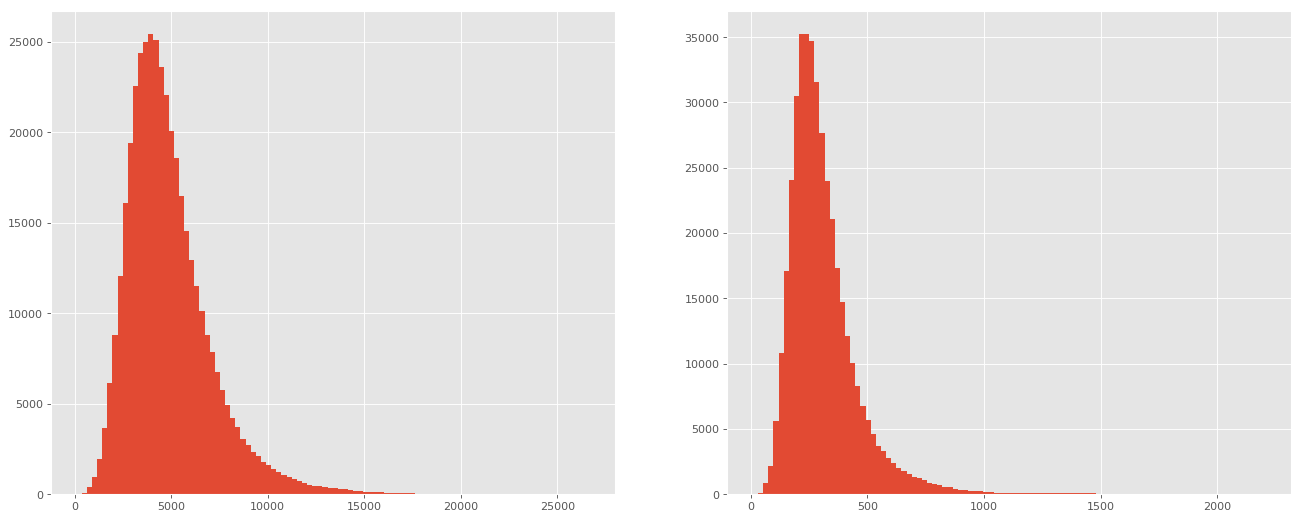

In [135]:
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80
plt.subplot('121')
df['NumberOfSales'].hist(bins=100)
plt.subplot('122')
df['NumberOfCustomers'].hist(bins=100)

In [136]:
y = df.groupby('Day_of_week')['NumberOfSales'].sum()

In [137]:
y

Day_of_week
Friday       335734069.0
Monday       393102876.0
Saturday     284235771.0
Sunday         9006738.0
Thursday     306282480.0
Tuesday      356000352.0
Wednesday    323902522.0
Name: NumberOfSales, dtype: float64

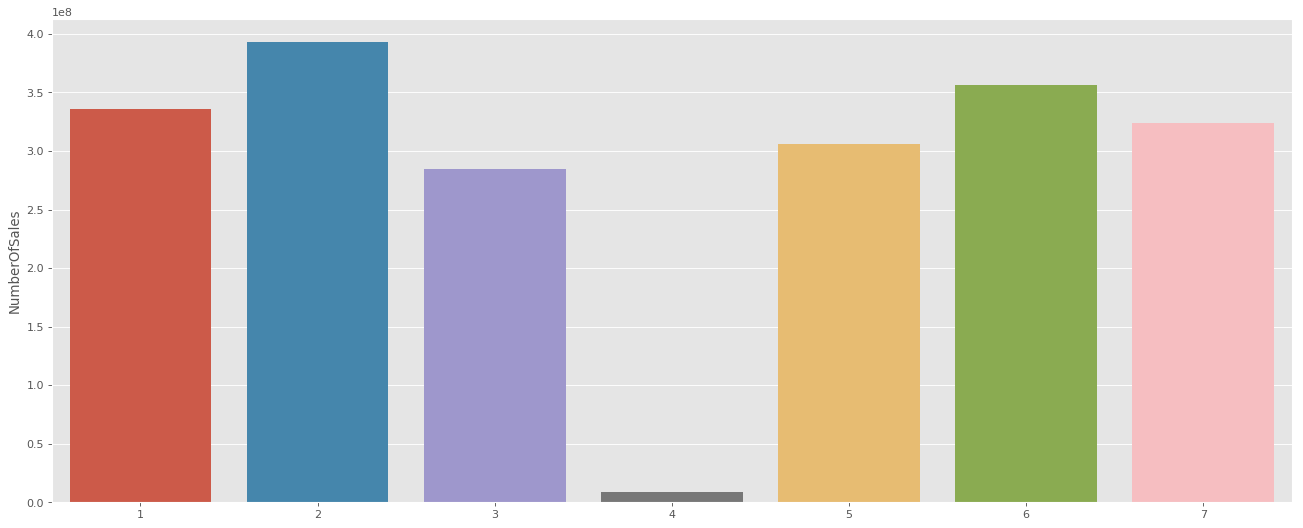

In [138]:
sns.barplot(x=np.arange(7)+1, y=y)

### Creating additional attributes

In [139]:
df['Year'] = df['Date'].apply(lambda x: int(x[:4]))
df['Month'] = df['Date'].apply(lambda x: int(x[5:7]))
df['Day'] = df['Date'].apply(lambda x: int(x[8:10]))

In [140]:
yms = df.groupby(['Year', 'Month'])['NumberOfSales'].sum()

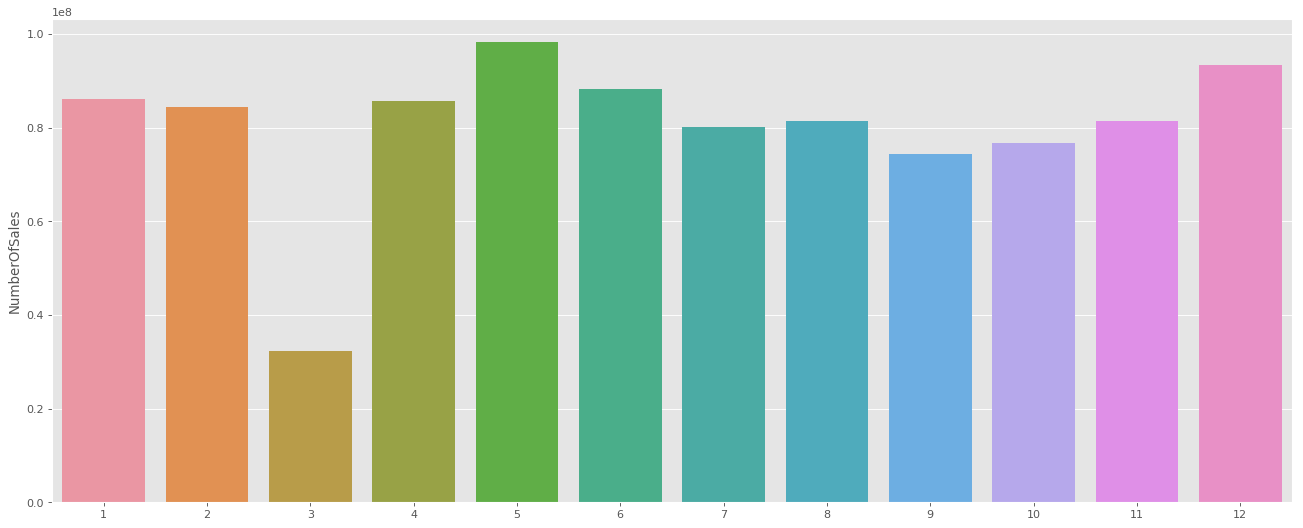

In [141]:
sns.barplot(x=np.arange(12)+1, y=yms[2017].sort_index())

# RANDOM FOREST REGRESSION

In [142]:
df = df.drop(['NumberOfCustomers','IsOpen','Date','StoreID','Region','Events','Day_of_week'], axis=1)
df.head().T

,0,1,2,3,4
IsHoliday,0.000000,0.000000,0.000000,0.000000,0.000000
HasPromotions,1.000000,1.000000,1.000000,0.000000,1.000000
NearestCompetitor,326.000000,326.000000,326.000000,326.000000,326.000000
NumberOfSales,7109.000000,8041.000000,7890.000000,6005.000000,8550.000000
Region_AreaKM2,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
Region_GDP,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
Region_PopulationK,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
CloudCover,6.000000,6.000000,5.000000,7.000000,6.000000
Max_Humidity,100.000000,87.000000,93.000000,64.000000,59.000000
Max_TemperatureC,9.000000,5.000000,7.000000,3.000000,3.000000


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('NumberOfSales', axis=1).values, df.NumberOfSales.values,\
                                                    test_size = 0.2)

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
params = range(20, 81, 20)  #50,201,50

In [147]:
scores, tst_scr = validation_curve(RandomForestRegressor(), X_train[:20000],\
                                   y_train[:20000], 'n_estimators', params, \
                                   cv=5, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.6min finished


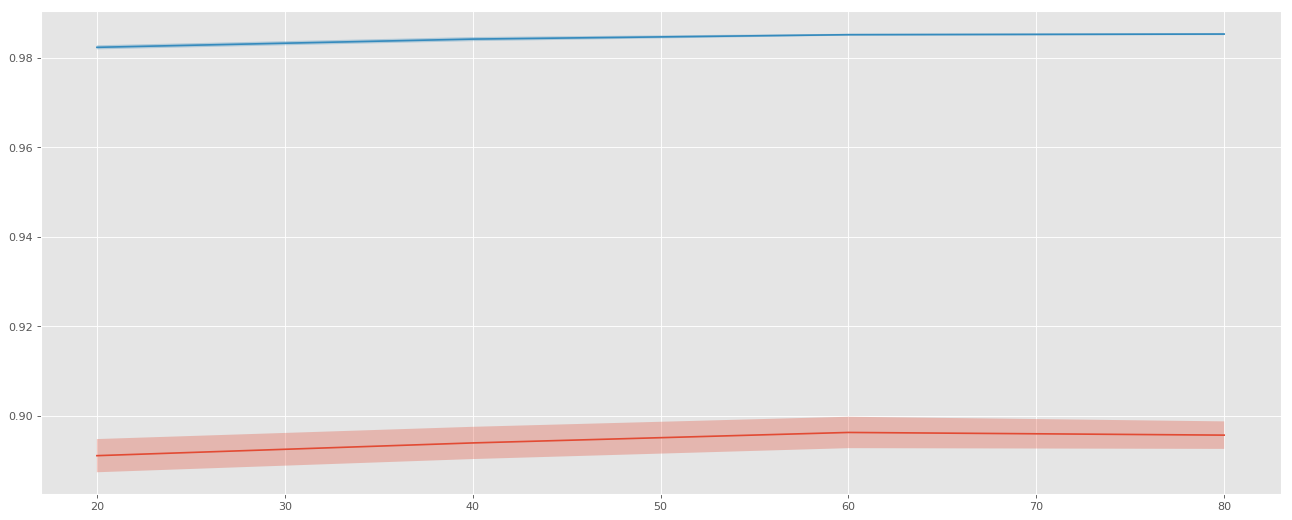

In [148]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [149]:
X_train.shape[1]

52

In [150]:
params = range(1, 20,2)

In [151]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=10), X_train[:20000], \
                                   y_train[:20000], 'max_features', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    6.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.2s finished


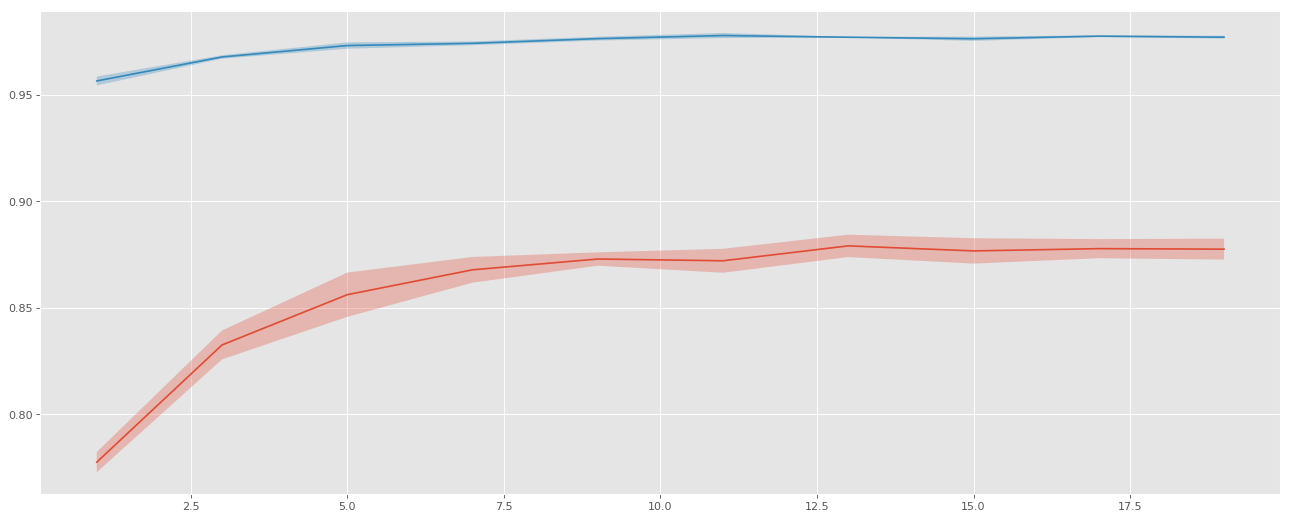

In [152]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [153]:
params = range(10, 51, 10)

In [154]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=100), X_train[:20000], \
                                   y_train[:20000], 'max_depth', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.7min finished


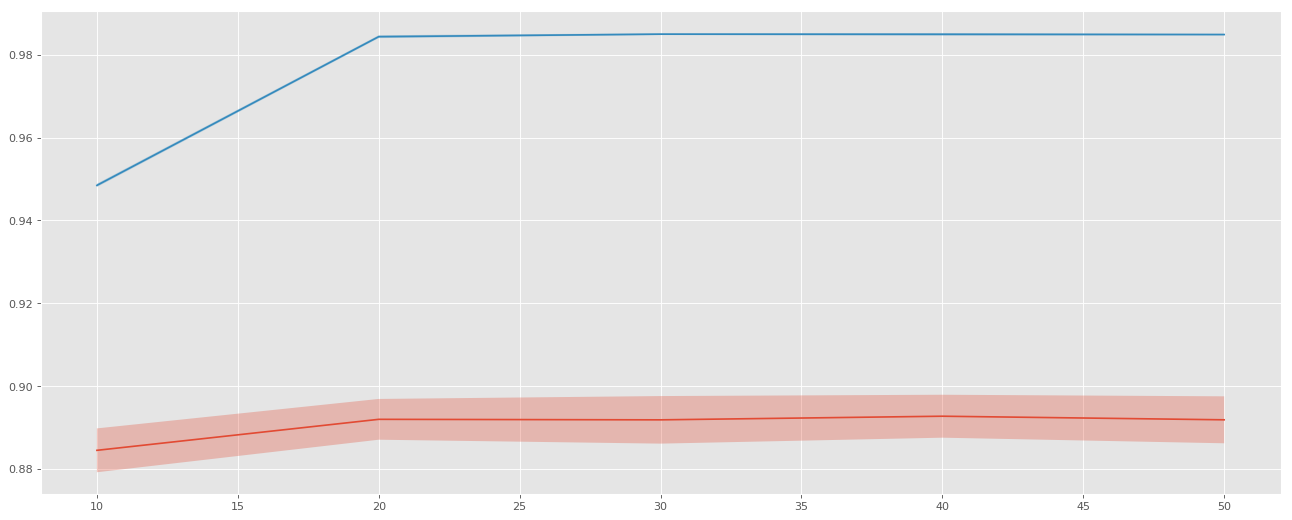

In [155]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [156]:
model1 = RandomForestRegressor(n_estimators=30, max_depth=20, n_jobs=-1, verbose=2)

In [157]:
model1.fit(X_train, y_train)

building tree 1 of 30building tree 2 of 30building tree 3 of 30building tree 4 of 30



building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [158]:
idx = model1.feature_importances_.argsort()[::-1]

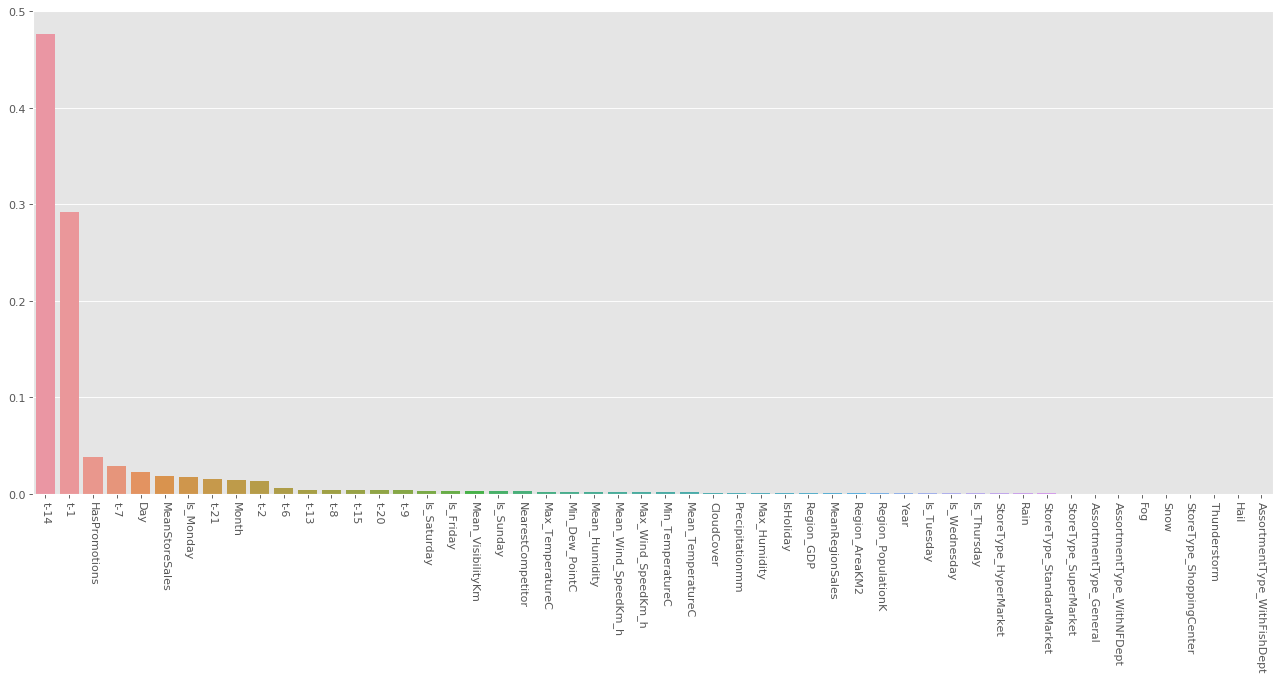

In [159]:
ax = sns.barplot(x=df.drop('NumberOfSales', axis=1).columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

In [160]:
y_pred = model1.predict(X_test)

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.7s finished


In [161]:
estim = model1.estimators_ 

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [163]:
mean_absolute_error(y_test, y_pred)

368.60694302142804

In [164]:
r2_score(y_test, y_pred)

0.9385321568483457

In [165]:
#defining mape
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = y_true.reshape(1, -1)
    y_pred = y_pred.reshape(1, -1)
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [166]:
mean_absolute_percentage_error(y_test, y_pred)

7.9594908403260085

In [167]:
X_train

array([[0.000e+00, 0.000e+00, 9.148e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 3.088e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 3.278e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 2.956e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 1.000e+00, 2.635e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.116e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [168]:
X_test[:, [3]].shape

(81848, 1)

In [169]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

#why memory error??

Residual sum of squares: 24601746051.70


## Sample of predicted results

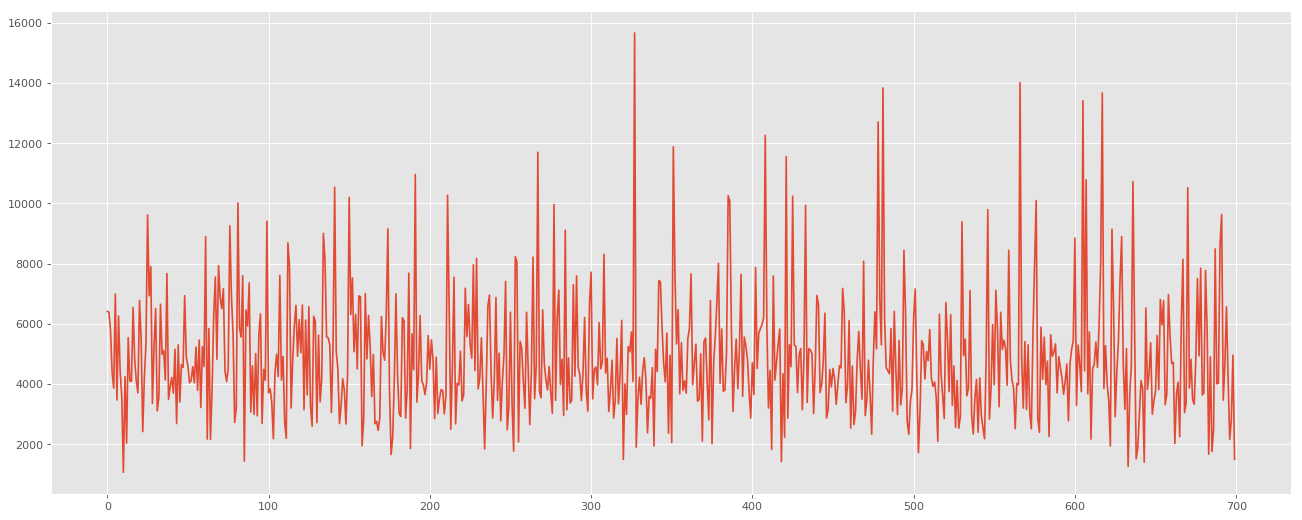

In [170]:
import matplotlib.pyplot as plt

y_pred_subset = y_pred[:700]
x_coordinate = [ 1 * i for i in range(len(y_pred_subset)) ]
plt.plot(x_coordinate,y_pred_subset)
plt.show()

## Sample of real results

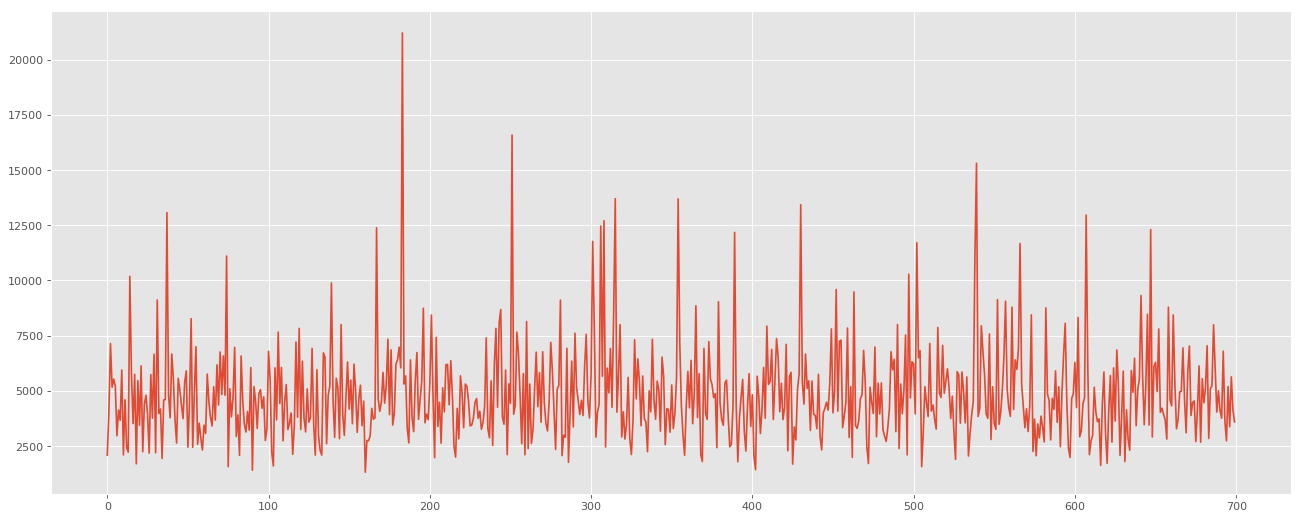

In [171]:
import matplotlib.pyplot as plt

y_train_subset = y_train[:700]
x_coordinate = [ 1 * i for i in range(len(y_train_subset)) ]
plt.plot(x_coordinate,y_train_subset)
plt.show()

## Real-Predicted

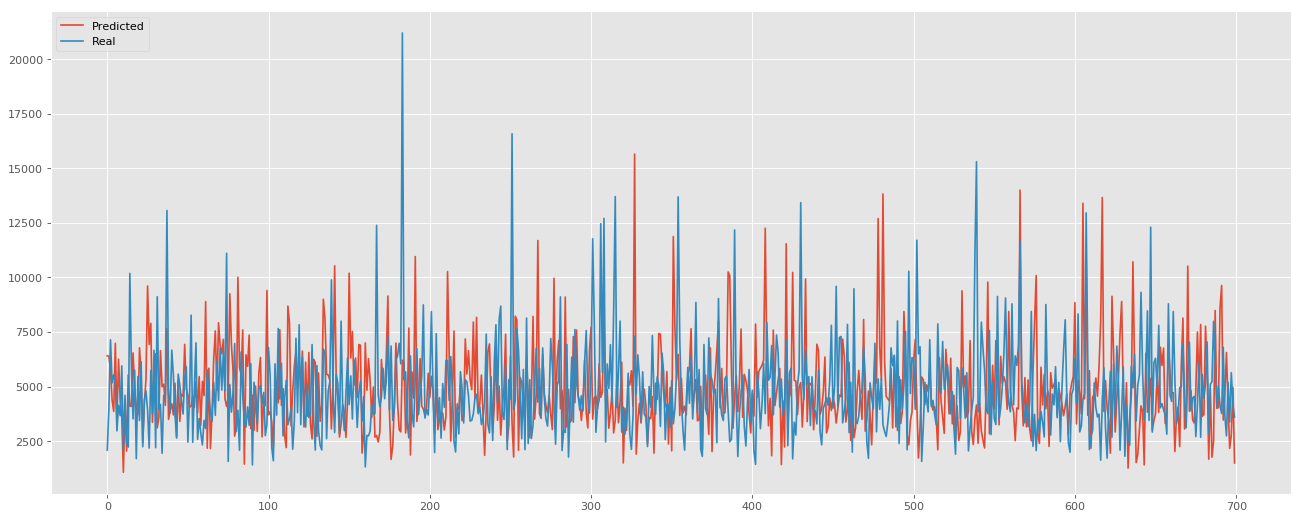

In [172]:
plt.plot(x_coordinate,y_pred_subset)
plt.plot(x_coordinate,y_train_subset)
plt.legend(['Predicted', 'Real'], loc='upper left')
plt.show()

### Saving model

In [97]:
#import pickle
#RFR_1 = pickle.dumps(model1)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#pickle.dump(model1, open("models\RFR_1","wb"))
#model1 = pickle.load(file=open("models\RFR_1","rb"))

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()